# Data classification with one hidden layer

In this notebook, you are going to build your first neural network from scratch, which will have a hidden layer. You will see a big difference between this model and the one you implemented using logistic regression. 


**You will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation


## 1 - Packages ##

Let's first import all the packages that you will need during this assignment.
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- testCases provides some test examples to assess the correctness of your functions (self-written file)
- planar_utils provide various useful functions used in this assignment (self-written file)

In [2]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases import *

import sklearn
import sklearn.datasets
import sklearn.linear_model
from utils import plot_decision_boundary, sigmoid, load_dataset, plot_point_on_decision_boundary, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## 2 - Dataset ##

Initially, we need to acquire the dataset that will be utilized. The subsequent code will import a "XOR" 2-class dataset into `X` and `Y` variables.
Using matplotlib the dataset can be visualized . The data resembles a checkerboard with four quadrants: one class (colored red, label y=0) occupies the top-right and bottom-left quadrants, and the other class (colored blue, label y=1) occupies the top-left and bottom-right quadrants.

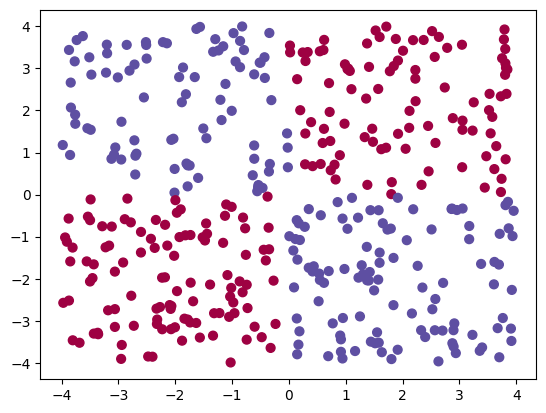

In [3]:
X, Y = load_dataset()
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

The objective is to construct a model that fits this data. In simpler terms, we want the classifier to delineate regions as either red or blue.
You possess:

    - a numpy-array (matrix) X that holds your features (x1, x2)
    - a numpy-array (vector) Y that holds your labels (red:0, blue:1).

**Exercise**: Verify that the dimensions of the feature matrix `X` and the label vector `Y` are correct by using the `shape` property.

How many features and training examples are used? Print their respective values.

In [4]:
### START CODE HERE ### (≈ 3 lines of code)
num_features = X.shape[0]
num_examples = Y.shape[1]
### END CODE HERE ###

print ('Num. of features: ' + str(num_features))
print ('Num. of training examples: ' + str(num_examples))
print ('Total dimensions of X: ' + str(X.shape))
print ('Total dimensions of Y: ' + str(Y.shape))

Num. of features: 2
Num. of training examples: 400
Total dimensions of X: (2, 400)
Total dimensions of Y: (1, 400)


**Expected Output**:
       
<table style="width:40%">
  <tr>
    <td><i>Num. of features</i></td>
    <td> 2 </td> 
  </tr>
  <tr>
    <td><i>Num. of training examples</i></td>
    <td>400 </td> 
  </tr>
  <tr>
    <td><i>Total dimensions of X</i></td>
    <td> (2, 400) </td> 
  </tr>
  <tr>
    <td><i>Total dimensions of Y</i></td>
    <td> (1, 400) </td> 
  </tr>
</table>

## 3 - Simple Logistic Regression

Before building a full neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [5]:
# Train the logistic regression classifier
logRegClass = sklearn.linear_model.LogisticRegressionCV()
logRegClass.fit(X.T, Y.T.ravel())   # ravel() is used to convert the 2D array to 1D array from shape (m, 1) to (m, )

LogisticRegressionCV()

You can now plot the decision boundary of these models. Run the code below.

Accuracy of logistic regression: 39 % (percentage of correctly labelled datapoints)


/var/folders/30/k01rk7w900xdwhm24thzzkyw0000gn/T/ipykernel_5423/3891410846.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +


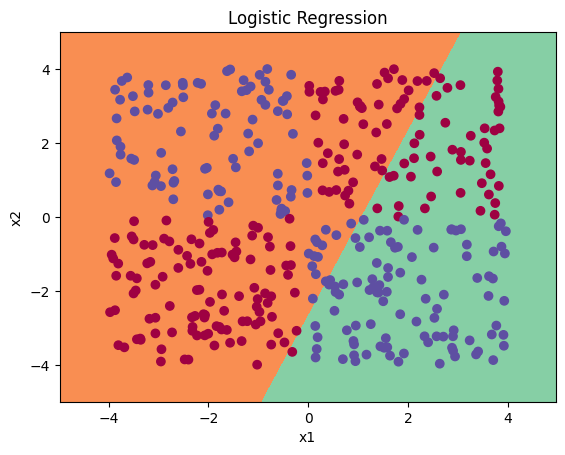

In [6]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: logRegClass.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = logRegClass.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Expected Output**:

<table style="width:20%">
  <tr>
    <td>**Accuracy**</td>
    <td> 39% </td> 
  </tr>
  
</table>


**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now! 

## 4 - Neural Network model

Logistic regression did not work well on the dataset. You are going to train a Neural Network with a single hidden layer.

**Here is our model**:

<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \text{if }  a^{[2](i)} > 0.5 \\ 0 & otherwise \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

The standard procedure to construct a neural network involves:

1. Specifying the structure of the neural network (# of input units, # of hidden units, etc).

2. Initializing the parameters of the model

3. Iterative process:
    - Execute forward propagation
    - Calculate loss
    - Carry out backward propagation to obtain the gradients
    - Update parameters using gradient descent

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

### 4.1 - Defining the neural network structure ####

**Exercise**: Define three variables:

- n_x: size of the input layer
- n_h: size of the hidden layer (set this to 4)
- n_y: size of the output layer

**Hint**: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [7]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)

    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]

    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [8]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


**Expected Output** (these are not the sizes you will use for your network, they are just used to assess the function you've just coded).

<table style="width:20%">
  <tr>
    <td><i>n_x<i></td>
    <td> 5 </td> 
  </tr>
    <tr>
    <td><i>n_h<i></td>
    <td> 4 </td> 
  </tr>
    <tr>
    <td><i>n_y<i></td>
    <td> 2 </td> 
  </tr>
</table>

### 4.2 - Initialize the model's parameters ####

**Exercise**: Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [9]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.seed(1)

    ### START CODE HERE ### (≈ 5 lines of code)

    parameters = {
        "W1": np.random.randn(n_h, n_x) * 0.01,
        "b1": np.zeros((n_h, 1)),
        "W2": np.random.randn(n_y, n_h) * 0.01,
        "b2": np.zeros((n_y, 1))
    }

    ### END CODE HERE ###

    assert (parameters["W1"].shape == (n_h, n_x))
    assert (parameters["b1"].shape == (n_h, 1))
    assert (parameters["W2"].shape == (n_y, n_h))
    assert (parameters["b2"].shape == (n_y, 1))

    return parameters

In [10]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]
 [ 0.00865408 -0.02301539]
 [ 0.01744812 -0.00761207]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.00319039 -0.0024937   0.01462108 -0.02060141]]
b2 = [[0.]]


**Expected Output**:

W1 = [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]
 [ 0.00865408 -0.02301539]
 [ 0.01744812 -0.00761207]]

b1 = [[0.]
 [0.]
 [0.]
 [0.]]

W2 = [[ 0.00319039 -0.0024937   0.01462108 -0.02060141]]

b2 = [[0.]]


### 4.3 - The Loop ####

**Question**: Implement `forward_propagation()`.

**Instructions**:
- Look above at the mathematical representation of your classifier.
- You can use the function `sigmoid()`. It is built-in (imported) in the notebook.
- You can use the function `np.tanh()`. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

In [11]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    # And implement Forward Propagation to calculate A2 (probabilities)

    ### START CODE HERE ### (≈ 4 lines of code)

    Z1 = np.dot(parameters["W1"], X) + parameters["b1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["W2"], A1) + parameters["b2"]
    A2 = sigmoid(Z2)

    ### END CODE HERE ###

    assert(A2.shape == (1, X.shape[1]))

    # Values needed in the backpropagation are stored in "cache". This will be given as an input to the backpropagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [12]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours.
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


**Expected Output**:
<table style="width:60%">
  <tr>
    <td> 0.26281864019752443 </td> <td> 0.09199904522700109 </td> <td>  -1.3076660128732143  </td> <td> 0.21287768171914198 </td> 
  </tr>
</table>

Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example. You can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Exercise**: Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. Can you do it without a single for-loop? The cost returned must be of type float!

In [13]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)

    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)

    """

    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 3 lines of code)

    cost = -1/m * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))

    ### END CODE HERE ###

    assert(isinstance(cost, float))

    return cost

In [14]:
A2, Y_assess = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess)))

cost = 0.6930587610394646


**Expected Output**:
<table style="width:20%">
  <tr>
    <td>cost</td>
    <td> 0.693058761... </td> 
  </tr>
  
</table>

Using the cache computed during forward propagation, you can now implement backward propagation.

**Question**: Implement the function `backward_propagation()`.

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  

<img src="images/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [15]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]

    # First, retrieve W1 and W2 from the dictionary "parameters".
    # Retrieve also A1 and A2 from dictionary "cache".
    # Backward propagation: calculate dW1, db1, dW2, db2.

    ### START CODE HERE ### (≈ 3 (retrieve) + 6 (back prop) lines of code)
    
    W1, W2 = parameters["W1"], parameters["W2"]
    A1, A2 = cache["A1"], cache["A2"]

    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    ### END CODE HERE ###

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [16]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


**Expected output**:

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]

db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]

dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]

db2 = [[-0.16655712]]

**Question**: Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

**Illustration**: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">



In [17]:
def update_parameters(parameters, grads, learning_rate):
    """
    Updates parameters using the gradient descent update rule given above

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients

    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters" and "grads"
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)

    W1 = parameters["W1"] - learning_rate * grads["dW1"]
    b1 = parameters["b1"] - learning_rate * grads["db1"]
    W2 = parameters["W2"] - learning_rate * grads["dW2"]
    b2 = parameters["b2"] - learning_rate * grads["db2"]

    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [18]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads,1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


**Expected Output**:

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]

b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]

W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]

b2 = [[0.00010457]]

### 4.4 - Integrate parts 4.1, 4.2 and 4.3 in nn_model() ####

**Question**: Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [19]:
# NN_model
def nn_model(X, Y, n_h, learning_rate, num_iterations = 10000, print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    # Initialize parameters
    # Loop (gradient descent)
    # Print every 1000 th cost to console, e.g. using print("Cost after iteration {}: {:.2e}".format(i, cost))

    ### START CODE HERE ### (≈ 12 lines of code)
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {compute_cost(A2, Y)}")

    ### END CODE HERE ###

    # Returns parameters learnt by the model. They can then be used to predict output
    return parameters


In [20]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, 1.02, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.6930732238909498
Cost after iteration 1000: 0.0002568424546238835
Cost after iteration 2000: 0.00012653305868230643
Cost after iteration 3000: 8.385085539684376e-05
Cost after iteration 4000: 6.2673476200595e-05
Cost after iteration 5000: 5.00251100770625e-05
Cost after iteration 6000: 4.161910992680824e-05
Cost after iteration 7000: 3.562858492743725e-05
Cost after iteration 8000: 3.11436737354392e-05
Cost after iteration 9000: 2.7660393124876097e-05
W1 = [[ 0.71755268 -1.31453125]
 [ 0.59877356 -1.12663319]
 [ 0.79780987 -1.46769183]
 [-0.62947016  1.18322848]]
b1 = [[-0.3248894 ]
 [-0.25385447]
 [-0.37673347]
 [ 0.27447488]]
W2 = [[ 2.88202257  2.09575348  3.66467962 -2.30197354]]
b2 = [[0.20492443]]


**Expected Output**:


 
**cost after iteration 0:**  6.93e-01


W1 = [[ 0.71755268 -1.31453125]
 [ 0.59877356 -1.12663319]
 [ 0.79780987 -1.46769183]
 [-0.62947016  1.18322848]]

b1 = [[-0.3248894 ]
 [-0.25385447]
 [-0.37673347]
 [ 0.27447488]]

W2 = [[ 2.88202257  2.09575348  3.66467962 -2.30197354]]

b2 = [[0.20492443]]

  
 

### 4.5 Predictions

**Question**: Use your model to predict by building predict().
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [21]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)

    predictions = forward_propagation(X, parameters)[0] > 0.5

    ### END CODE HERE ###

    return predictions.astype(int)

In [23]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


**Expected Output**: 


<table style="width:40%">
  <tr>
    <td>predictions mean</td>
    <td> 0.666666666667 </td> 
  </tr>
  
</table>

It is time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.

Cost after iteration 0: 0.6931555379208729
Cost after iteration 1000: 0.09019788770200263
Cost after iteration 2000: 0.0550300954002571
Cost after iteration 3000: 0.04599301831844242
Cost after iteration 4000: 0.04240401281509994
Cost after iteration 5000: 0.04049562683936918
Cost after iteration 6000: 0.039336316769698114
Cost after iteration 7000: 0.0385749389496105
Cost after iteration 8000: 0.03804401239519981
Cost after iteration 9000: 0.037657115934297346


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

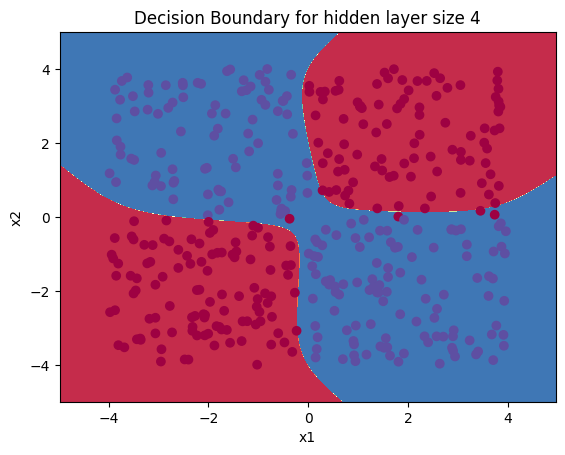

In [24]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, 4, 0.9 , num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

**Expected Output**:

<table style="width:40%">
  <tr>
    <td>Cost after iteration 9000</td>
    <td> 1.62e-01 </td> 
  </tr>
  
</table>


In [25]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 99%


/var/folders/30/k01rk7w900xdwhm24thzzkyw0000gn/T/ipykernel_5423/2040981789.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100) + '%')


**Expected Output**: 

<table style="width:15%">
  <tr>
    <td>Accuracy</td>
    <td> 90% </td> 
  </tr>
</table>

Accuracy is really high compared to Logistic Regression. The model has learnt the leaf patterns of the data! Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression. 

If we considered our model to be ready for being used inside of an application, we could now provide the coordinates of a random point and watch our model predicting the color for that point. You can give it a try here:

Point location:  [[-2.87690449 -2.41518809]]
Predicted value for a single point: Red


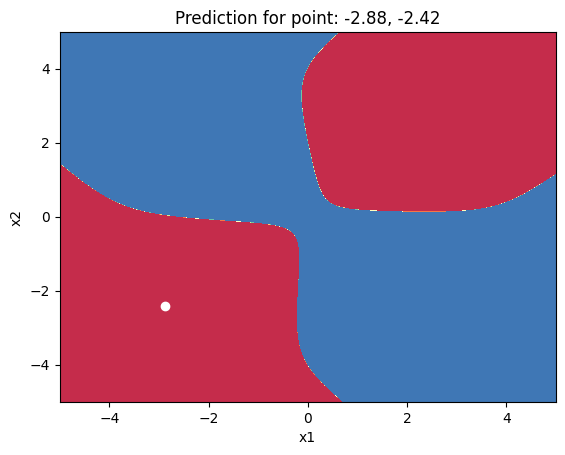

In [26]:
single_point = np.random.uniform(low=-4, high=4, size=(1, 2))
print("Point location: ", single_point)
prediction_single_point = predict(parameters, single_point.T)
print("Predicted value for a single point:", "Red" if prediction_single_point == 0 else "Blue")
plt.title("Prediction for point: {x:.2f}, {y:.2f}".format(x=single_point.flatten()[0], y=single_point.flatten()[1]))
plot_point_on_decision_boundary(lambda single_point: predict(parameters, single_point.T),
                                single_point.T,
                                prediction_single_point.flatten())

### 4.6 - Tuning hidden layer size (optional/ungraded exercise) ###

Run the following code. It may take 1-2 minutes. You will observe different behaviors of the model for various hidden layer sizes.

Cost after iteration 0: 0.6931747636495379
Cost after iteration 1000: 0.3430413246850998
Cost after iteration 2000: 0.34305869412636353
Cost after iteration 3000: 0.3430599896029025
Cost after iteration 4000: 0.34306007785304665
Cost after iteration 5000: 0.3430600838299944
Cost after iteration 6000: 0.3430600842346385
Cost after iteration 7000: 0.34306008426203255
Cost after iteration 8000: 0.3430600842638872
Cost after iteration 9000: 0.3430600842640128
Accuracy for 1 hidden units: 86.0 %
Cost after iteration 0: 0.693116286924444
Cost after iteration 1000: 0.32802058487414754
Cost after iteration 2000: 0.305554021949736
Cost after iteration 3000: 0.30400125064097605
Cost after iteration 4000: 0.2987442708498354
Cost after iteration 5000: 0.297038305334173
Cost after iteration 6000: 0.2960312307794285


/var/folders/30/k01rk7w900xdwhm24thzzkyw0000gn/T/ipykernel_5423/2945013318.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)


Cost after iteration 7000: 0.29550486928973196
Cost after iteration 8000: 0.29518491895951215
Cost after iteration 9000: 0.2949513758922959
Accuracy for 2 hidden units: 87.0 %
Cost after iteration 0: 0.6930404378180179
Cost after iteration 1000: 0.30455988632460346
Cost after iteration 2000: 0.140164580240367
Cost after iteration 3000: 0.1369683337183369
Cost after iteration 4000: 0.1359783315017049
Cost after iteration 5000: 0.13548633375170113
Cost after iteration 6000: 0.1351799194308185
Cost after iteration 7000: 0.1349615140033529
Cost after iteration 8000: 0.13479113184378202
Cost after iteration 9000: 0.1346493642706235
Accuracy for 3 hidden units: 95.0 %
Cost after iteration 0: 0.6931581951190767
Cost after iteration 1000: 0.1834224517461665
Cost after iteration 2000: 0.14139263228384197
Cost after iteration 3000: 0.136976115033352
Cost after iteration 4000: 0.13482670217213474
Cost after iteration 5000: 0.12648947246613634
Cost after iteration 6000: 0.12013376010241325
Cost af

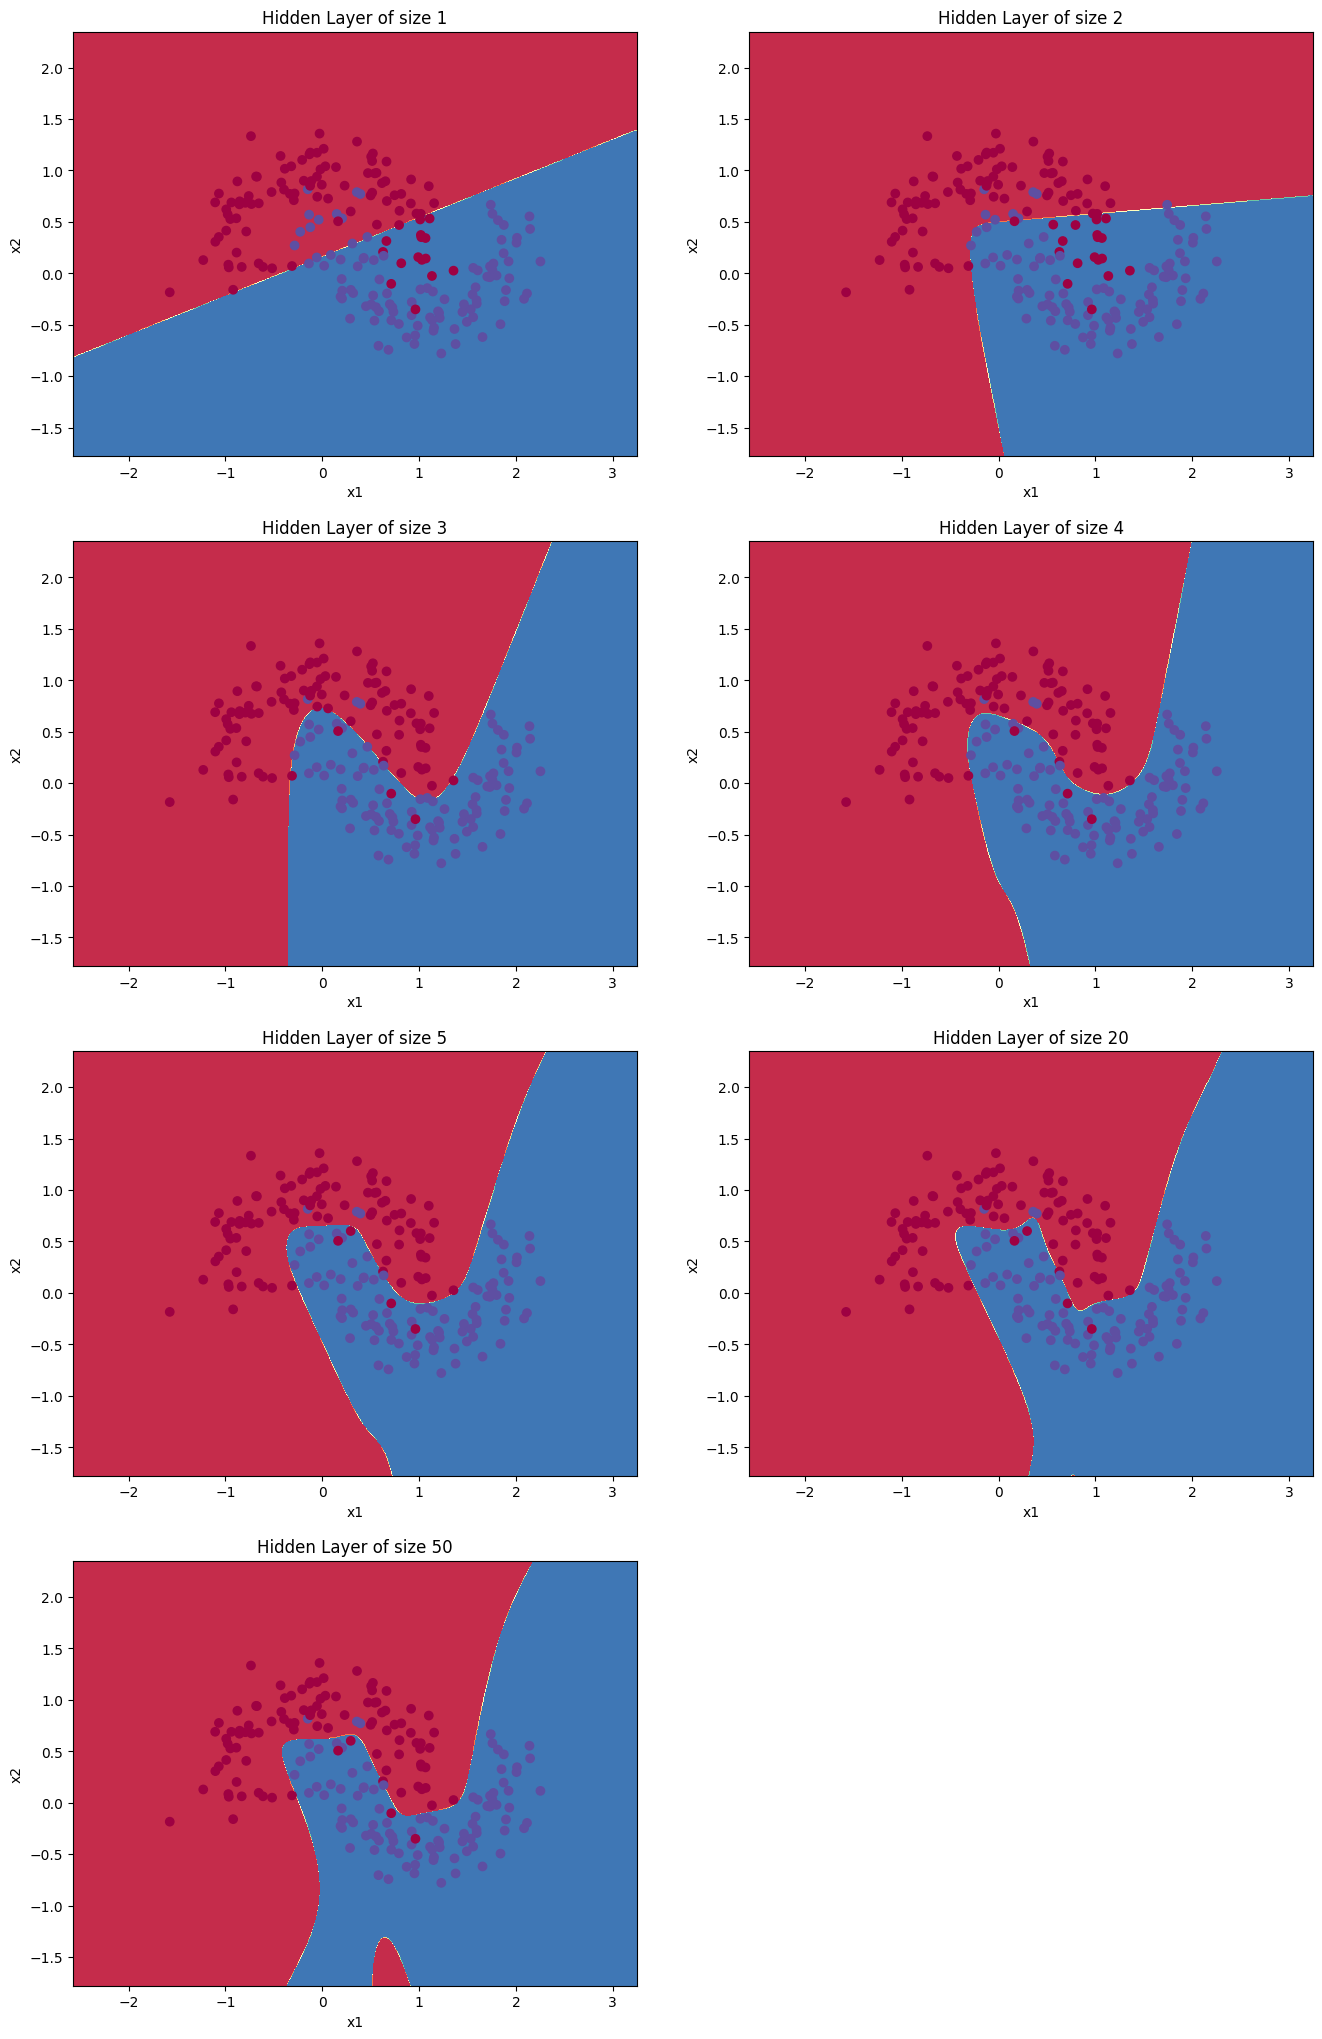

In [30]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h,0.9, num_iterations = 10000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 5-20. Indeed, a value around here seems to  fits the data well without also incurring noticeable overfitting.
- You will also learn later about regularization, which lets you use very large models (such as n_h = 50) without much overfitting. 

**Optional questions**:


Some optional/ungraded questions that you can explore if you wish: 
- What happens when you change the tanh activation for a sigmoid activation or a ReLU activation?
- Play with the learning_rate. What happens?
- What if we change the dataset? (See part 5 below!)

<font color='red'>
You've learnt to:

- Build a complete neural network with a hidden layer

- Make a good use of a non-linear unit

- Implemented forward propagation and backpropagation, and trained a neural network

- See the impact of varying the hidden layer size, including overfitting.

Nice work! 

## 5) Performance on other datasets

If you want, you can rerun the whole notebook (minus the dataset part) for each of the following datasets.

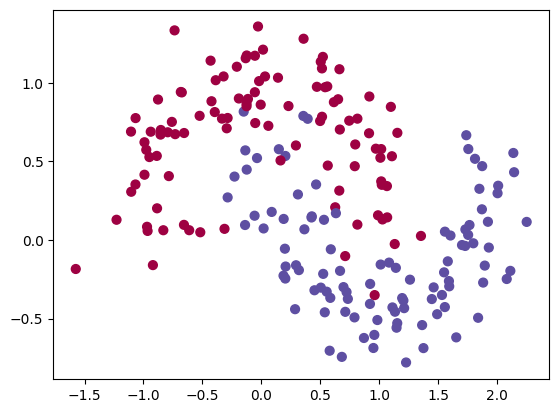

In [29]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

Congrats on finishing this Programming Assignment!

Reference:
- Deep Learning Specialization from deeplearning.ai https://www.coursera.org/specializations/deep-learning
- http://scs.ryerson.ca/~aharley/neural-networks/
- http://cs231n.github.io/neural-networks-case-study/